In [9]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
import os
import pandas as pd
import glob 

In [10]:
ravdess_clean_list = glob.glob('clean/Users/ioann/radvess-XYMA/*.wav')
savee_clean_list = glob.glob('clean/Users/ioann/saveelist/*.wav')

In [11]:
def build_ravdess_index(file_list):
    
    emotion_key = {'01': 'neutral', '02': 'neutral', '03': 'happy', '04': 'sad', '05': 'angry', '06': 'fearful', '07': 'disgusted', '08': 'surprised'}
    df = { 'emotion': [] }
   

    for file in file_list:
        props = file.split('-')
        
        df['emotion'].append(emotion_key[props[3]])
        

        
       

       

    file_properties = pd.DataFrame(df)
    
    return file_properties

In [12]:
labels_ravdess = build_ravdess_index(ravdess_clean_list)

In [13]:
def build_savee_index(file_list):
    
    emotion_key = {'n': 'neutral', 'h': 'happy', 'sa': 'sad', 'a': 'angry', 'f': 'fearful', 'd': 'disgusted', 'su': 'surprised'}
    df = { 'emotion': [] }
   

    for file in file_list:
        

        props = file.split('/')[3][10:]
       
        df['emotion'].append(emotion_key[props[ :-9]])
       

       

    file_properties = pd.DataFrame(df)
    
    return file_properties

In [14]:
labels_savee=build_savee_index(savee_clean_list)

In [16]:
df = pd.DataFrame(columns=['feature'])
bookmark=0



path = '/Users/ioann/radvess-XYMA/'




for subdir, dirs, files in os.walk(path):
    for file in files:
      
        #Load librosa array, obtain mfcss, store the file and the mcss information in a new array
        X, sample_rate = librosa.load(os.path.join(subdir,file), res_type='kaiser_fast')
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
        feature = mfccs
        df.loc[bookmark] = [feature]
        bookmark=bookmark+1

In [17]:
ravdess_features = pd.DataFrame(df['feature'].values.tolist())


In [18]:
ravdess_features

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-700.398878,58.630210,-3.025852,16.040243,4.248529,3.869935,-6.381717,-0.188634,-13.735003,-0.319723,...,-1.411359,-2.769772,-2.042008,-2.522663,-2.507449,-2.250499,-0.381507,-2.481059,-2.791022,-2.244866
1,-653.169017,58.028073,-12.581209,11.818785,-7.681562,-0.617142,-8.337758,-5.823571,-6.547591,1.458057,...,0.788761,2.570493,2.558635,3.708506,2.790020,2.201920,-1.021457,0.819200,-0.277811,0.207586
2,-617.052327,60.103365,-5.984258,13.886286,1.120427,0.511750,-14.841357,-4.016369,-5.575839,-6.309851,...,-1.133367,-2.019846,-1.024787,0.331097,0.531833,-1.621018,-2.158077,-2.502774,-0.676132,2.089097
3,-698.721214,47.088487,-11.333611,12.963090,-8.005652,-1.252229,-10.009068,-9.434125,-10.318875,-0.864674,...,-0.299306,-0.004270,-1.408215,0.958173,2.574661,1.877765,1.608618,0.222401,4.338524,4.266795
4,-715.922663,71.976798,4.457525,18.602500,8.404048,3.621956,-1.974365,0.022674,-2.678083,4.232804,...,0.505697,0.424780,0.972097,0.210004,0.667769,1.918957,0.174543,-1.768463,-1.512281,-0.253280
5,-739.440873,55.755429,-23.246592,13.280397,-3.838021,-5.957225,-12.653000,-6.214706,-10.689208,3.398455,...,4.583356,5.935799,4.206937,5.363243,4.332376,3.667531,1.550318,-0.558750,1.737009,3.253290
6,-653.982540,77.230163,1.074312,23.132712,5.029030,2.561855,-10.727559,-3.295055,-1.869739,-0.463441,...,-4.285201,-0.391933,-1.683185,-1.358684,-2.281433,-3.152291,-5.220386,-3.469335,-1.696725,-0.342364
7,-692.393582,68.048347,3.857427,26.590947,2.598323,6.667670,1.640871,-4.939541,-1.004390,1.792656,...,1.513685,1.524577,2.985039,5.605745,5.896914,5.154771,4.143033,5.628289,4.912781,4.313900
8,-741.353967,96.758128,16.994427,37.401855,17.461665,14.264806,1.034319,9.790047,3.433929,9.897499,...,1.575394,2.135275,1.080048,0.077569,1.954016,0.924915,-0.342838,-1.029033,-1.741040,-0.339235
9,-574.430922,56.297725,-3.995249,9.307219,0.660650,0.722855,-10.766332,-3.891049,-7.494775,1.972640,...,3.434052,3.164500,5.605457,3.372160,5.965045,2.542946,2.380176,1.891932,1.244445,3.589855


In [19]:
df = pd.DataFrame(columns=['feature'])
bookmark=0



path = '/Users/ioann/saveelist/'




for subdir, dirs, files in os.walk(path):
    for file in files:
      
        #Load librosa array, obtain mfcss, store the file and the mcss information in a new array
        X, sample_rate = librosa.load(os.path.join(subdir,file), res_type='kaiser_fast')
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
        feature = mfccs
        df.loc[bookmark] = [feature]
        bookmark=bookmark+1

In [20]:
savee_features = pd.DataFrame(df['feature'].values.tolist())

In [62]:
#not the whole radvess cause its a lot bigger
X_train=ravdess_features[:1700]

X_test=savee_features 



In [63]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y_train=labels_ravdess[:1700]
y_test=labels_savee
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

In [64]:

y_train.shape

(1700, 7)

In [65]:
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint

model = Sequential()

model.add(Conv1D(256, 5,padding='same',
                 input_shape=(40,1)))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
#model.add(Conv1D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Conv1D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(7))
model.add(Activation('softmax'))
opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)

In [67]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_25 (Conv1D)           (None, 40, 256)           1536      
_________________________________________________________________
activation_31 (Activation)   (None, 40, 256)           0         
_________________________________________________________________
conv1d_26 (Conv1D)           (None, 40, 128)           163968    
_________________________________________________________________
activation_32 (Activation)   (None, 40, 128)           0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 40, 128)           0         
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 5, 128)            0         
_________________________________________________________________
conv1d_27 (Conv1D)           (None, 5, 128)           

In [68]:

model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [ ]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=700,validation_data=(x_testcnn, y_test))



Train on 1700 samples, validate on 480 samples
Epoch 1/700
1700/1700 [==============================] - 1s 780us/step - loss: 2.1926 - accuracy: 0.2653 - val_loss: 1.9130 - val_accuracy: 0.2708
Epoch 2/700
1700/1700 [==============================] - 1s 610us/step - loss: 1.9117 - accuracy: 0.3012 - val_loss: 1.9585 - val_accuracy: 0.2562
Epoch 3/700
1700/1700 [==============================] - 1s 613us/step - loss: 1.8182 - accuracy: 0.3282 - val_loss: 1.9756 - val_accuracy: 0.2500
Epoch 4/700
1700/1700 [==============================] - 1s 612us/step - loss: 1.7472 - accuracy: 0.3347 - val_loss: 1.9962 - val_accuracy: 0.2500
Epoch 5/700
1700/1700 [==============================] - 1s 598us/step - loss: 1.7091 - accuracy: 0.3429 - val_loss: 1.9426 - val_accuracy: 0.2729
Epoch 6/700
1700/1700 [==============================] - 1s 594us/step - loss: 1.6564 - accuracy: 0.3606 - val_loss: 2.0038 - val_accuracy: 0.2542
Epoch 7/700
1700/1700 [==============================] - 1s 595us/step

Epoch 55/700
1700/1700 [==============================] - 1s 600us/step - loss: 1.2310 - accuracy: 0.5435 - val_loss: 2.3257 - val_accuracy: 0.2604
Epoch 56/700
1700/1700 [==============================] - 1s 595us/step - loss: 1.2402 - accuracy: 0.5424 - val_loss: 2.6209 - val_accuracy: 0.2604
Epoch 57/700
1700/1700 [==============================] - 1s 615us/step - loss: 1.2373 - accuracy: 0.5400 - val_loss: 2.3949 - val_accuracy: 0.2458
Epoch 58/700
1700/1700 [==============================] - 1s 629us/step - loss: 1.2216 - accuracy: 0.5476 - val_loss: 2.7055 - val_accuracy: 0.2562
Epoch 59/700
1700/1700 [==============================] - 1s 591us/step - loss: 1.2287 - accuracy: 0.5494 - val_loss: 2.5235 - val_accuracy: 0.2458
Epoch 60/700
1700/1700 [==============================] - 1s 591us/step - loss: 1.2141 - accuracy: 0.5588 - val_loss: 2.5819 - val_accuracy: 0.2604
Epoch 61/700
1700/1700 [==============================] - 1s 592us/step - loss: 1.2094 - accuracy: 0.5518 - val_

1700/1700 [==============================] - 1s 595us/step - loss: 1.0251 - accuracy: 0.6247 - val_loss: 2.9359 - val_accuracy: 0.2333
Epoch 111/700
1700/1700 [==============================] - 1s 593us/step - loss: 1.0307 - accuracy: 0.6265 - val_loss: 2.9910 - val_accuracy: 0.2375
Epoch 112/700
1700/1700 [==============================] - 1s 606us/step - loss: 1.0237 - accuracy: 0.6294 - val_loss: 3.0660 - val_accuracy: 0.2333
Epoch 113/700
1700/1700 [==============================] - 1s 590us/step - loss: 1.0203 - accuracy: 0.6359 - val_loss: 3.1411 - val_accuracy: 0.2271
Epoch 114/700
1700/1700 [==============================] - 1s 591us/step - loss: 1.0069 - accuracy: 0.6288 - val_loss: 3.0241 - val_accuracy: 0.2479
Epoch 115/700
1700/1700 [==============================] - 1s 590us/step - loss: 1.0018 - accuracy: 0.6376 - val_loss: 3.2096 - val_accuracy: 0.2146
Epoch 116/700
1700/1700 [==============================] - 1s 589us/step - loss: 1.0064 - accuracy: 0.6365 - val_loss: 2

1700/1700 [==============================] - 1s 590us/step - loss: 0.8820 - accuracy: 0.6771 - val_loss: 3.3696 - val_accuracy: 0.2208
Epoch 166/700
1700/1700 [==============================] - 1s 593us/step - loss: 0.8797 - accuracy: 0.6947 - val_loss: 3.5683 - val_accuracy: 0.2208
Epoch 167/700
1700/1700 [==============================] - 1s 636us/step - loss: 0.8727 - accuracy: 0.6882 - val_loss: 3.4721 - val_accuracy: 0.2438
Epoch 168/700
1700/1700 [==============================] - 1s 685us/step - loss: 0.8782 - accuracy: 0.6824 - val_loss: 3.7592 - val_accuracy: 0.2188
Epoch 169/700
1700/1700 [==============================] - 1s 593us/step - loss: 0.8667 - accuracy: 0.6953 - val_loss: 3.3196 - val_accuracy: 0.2250
Epoch 170/700
1700/1700 [==============================] - 1s 587us/step - loss: 0.8645 - accuracy: 0.6994 - val_loss: 3.4218 - val_accuracy: 0.2375
Epoch 171/700
1700/1700 [==============================] - 1s 588us/step - loss: 0.8779 - accuracy: 0.6965 - val_loss: 3

1700/1700 [==============================] - 1s 591us/step - loss: 0.7692 - accuracy: 0.7324 - val_loss: 4.0922 - val_accuracy: 0.2354
Epoch 221/700
1700/1700 [==============================] - 1s 586us/step - loss: 0.7671 - accuracy: 0.7347 - val_loss: 4.3305 - val_accuracy: 0.2271
Epoch 222/700
1700/1700 [==============================] - 1s 590us/step - loss: 0.7642 - accuracy: 0.7312 - val_loss: 4.2320 - val_accuracy: 0.2354
Epoch 223/700
1700/1700 [==============================] - 1s 589us/step - loss: 0.7676 - accuracy: 0.7324 - val_loss: 4.2561 - val_accuracy: 0.2188
Epoch 224/700
1700/1700 [==============================] - 1s 593us/step - loss: 0.7596 - accuracy: 0.7359 - val_loss: 4.3105 - val_accuracy: 0.2292
Epoch 225/700
1700/1700 [==============================] - 1s 590us/step - loss: 0.7582 - accuracy: 0.7400 - val_loss: 4.0382 - val_accuracy: 0.2271
Epoch 226/700
1700/1700 [==============================] - 1s 587us/step - loss: 0.7625 - accuracy: 0.7347 - val_loss: 4

1700/1700 [==============================] - 1s 591us/step - loss: 0.6696 - accuracy: 0.7735 - val_loss: 4.4063 - val_accuracy: 0.2313
Epoch 276/700
1700/1700 [==============================] - 1s 591us/step - loss: 0.6574 - accuracy: 0.7765 - val_loss: 4.6246 - val_accuracy: 0.2354
Epoch 277/700
1700/1700 [==============================] - 1s 630us/step - loss: 0.6685 - accuracy: 0.7688 - val_loss: 4.5689 - val_accuracy: 0.2333
Epoch 278/700
1700/1700 [==============================] - 1s 605us/step - loss: 0.6611 - accuracy: 0.7724 - val_loss: 4.5100 - val_accuracy: 0.2313
Epoch 279/700
1700/1700 [==============================] - 1s 587us/step - loss: 0.6612 - accuracy: 0.7694 - val_loss: 4.5031 - val_accuracy: 0.2313
Epoch 280/700
1700/1700 [==============================] - 1s 589us/step - loss: 0.6612 - accuracy: 0.7706 - val_loss: 4.5996 - val_accuracy: 0.2313
Epoch 281/700
1700/1700 [==============================] - 1s 587us/step - loss: 0.6668 - accuracy: 0.7729 - val_loss: 4

1700/1700 [==============================] - 1s 583us/step - loss: 0.5818 - accuracy: 0.8106 - val_loss: 5.0370 - val_accuracy: 0.2313
Epoch 331/700
1700/1700 [==============================] - 1s 588us/step - loss: 0.5763 - accuracy: 0.7988 - val_loss: 5.0675 - val_accuracy: 0.2313
Epoch 332/700
1700/1700 [==============================] - 1s 591us/step - loss: 0.5764 - accuracy: 0.8000 - val_loss: 5.0392 - val_accuracy: 0.2333
Epoch 333/700
1700/1700 [==============================] - 1s 584us/step - loss: 0.5721 - accuracy: 0.8135 - val_loss: 5.0761 - val_accuracy: 0.2292
Epoch 334/700
1700/1700 [==============================] - 1s 591us/step - loss: 0.5804 - accuracy: 0.7959 - val_loss: 5.3012 - val_accuracy: 0.2292
Epoch 335/700
1700/1700 [==============================] - 1s 591us/step - loss: 0.5799 - accuracy: 0.8065 - val_loss: 5.0783 - val_accuracy: 0.2292
Epoch 336/700
1700/1700 [==============================] - 1s 590us/step - loss: 0.5873 - accuracy: 0.8006 - val_loss: 4

1700/1700 [==============================] - 1s 588us/step - loss: 0.5156 - accuracy: 0.8271 - val_loss: 5.3957 - val_accuracy: 0.2333
Epoch 386/700
1700/1700 [==============================] - 1s 619us/step - loss: 0.5023 - accuracy: 0.8276 - val_loss: 5.7033 - val_accuracy: 0.2313
Epoch 387/700
1700/1700 [==============================] - 1s 623us/step - loss: 0.4993 - accuracy: 0.8376 - val_loss: 5.6709 - val_accuracy: 0.2313
Epoch 388/700
1700/1700 [==============================] - 1s 596us/step - loss: 0.5059 - accuracy: 0.8324 - val_loss: 5.8584 - val_accuracy: 0.2271
Epoch 389/700
1700/1700 [==============================] - 1s 592us/step - loss: 0.5119 - accuracy: 0.8271 - val_loss: 5.3601 - val_accuracy: 0.2313
Epoch 390/700
1700/1700 [==============================] - 1s 594us/step - loss: 0.5094 - accuracy: 0.8300 - val_loss: 5.6379 - val_accuracy: 0.2333
Epoch 391/700
1700/1700 [==============================] - 1s 591us/step - loss: 0.5028 - accuracy: 0.8347 - val_loss: 5

1700/1700 [==============================] - 1s 590us/step - loss: 0.4534 - accuracy: 0.8576 - val_loss: 6.2955 - val_accuracy: 0.2375
Epoch 441/700
1700/1700 [==============================] - 1s 585us/step - loss: 0.4406 - accuracy: 0.8618 - val_loss: 5.7613 - val_accuracy: 0.2313
Epoch 442/700
1700/1700 [==============================] - 1s 590us/step - loss: 0.4482 - accuracy: 0.8518 - val_loss: 6.2838 - val_accuracy: 0.2333
Epoch 443/700
1700/1700 [==============================] - 1s 591us/step - loss: 0.4333 - accuracy: 0.8618 - val_loss: 6.4684 - val_accuracy: 0.2354
Epoch 444/700
1700/1700 [==============================] - 1s 587us/step - loss: 0.4373 - accuracy: 0.8606 - val_loss: 5.9842 - val_accuracy: 0.2354
Epoch 445/700
1700/1700 [==============================] - 1s 589us/step - loss: 0.4394 - accuracy: 0.8547 - val_loss: 6.2581 - val_accuracy: 0.2313
Epoch 446/700
1700/1700 [==============================] - 1s 590us/step - loss: 0.4325 - accuracy: 0.8618 - val_loss: 6

1700/1700 [==============================] - 1s 578us/step - loss: 0.3868 - accuracy: 0.8812 - val_loss: 6.8950 - val_accuracy: 0.2354
Epoch 496/700
1700/1700 [==============================] - 1s 593us/step - loss: 0.3818 - accuracy: 0.8700 - val_loss: 7.0624 - val_accuracy: 0.2354
Epoch 497/700
1700/1700 [==============================] - 1s 625us/step - loss: 0.3796 - accuracy: 0.8724 - val_loss: 6.6938 - val_accuracy: 0.2354
Epoch 498/700
1700/1700 [==============================] - 1s 578us/step - loss: 0.3709 - accuracy: 0.8818 - val_loss: 6.6844 - val_accuracy: 0.2354
Epoch 499/700
1700/1700 [==============================] - 1s 584us/step - loss: 0.3834 - accuracy: 0.8788 - val_loss: 6.2474 - val_accuracy: 0.2313
Epoch 500/700
1700/1700 [==============================] - 1s 584us/step - loss: 0.3893 - accuracy: 0.8712 - val_loss: 6.8931 - val_accuracy: 0.2354
Epoch 501/700
1700/1700 [==============================] - 1s 581us/step - loss: 0.3732 - accuracy: 0.8800 - val_loss: 6

1700/1700 [==============================] - 1s 590us/step - loss: 0.3141 - accuracy: 0.9047 - val_loss: 7.3435 - val_accuracy: 0.2333
Epoch 551/700
1700/1700 [==============================] - 1s 593us/step - loss: 0.3331 - accuracy: 0.8959 - val_loss: 7.6438 - val_accuracy: 0.2396
Epoch 552/700
1700/1700 [==============================] - 1s 608us/step - loss: 0.3394 - accuracy: 0.8953 - val_loss: 7.0084 - val_accuracy: 0.2396
Epoch 553/700
1700/1700 [==============================] - 1s 601us/step - loss: 0.3389 - accuracy: 0.8906 - val_loss: 7.2293 - val_accuracy: 0.2375
Epoch 554/700
1700/1700 [==============================] - 1s 607us/step - loss: 0.3243 - accuracy: 0.8900 - val_loss: 7.5450 - val_accuracy: 0.2354
Epoch 555/700
1700/1700 [==============================] - 1s 617us/step - loss: 0.3257 - accuracy: 0.9035 - val_loss: 7.1437 - val_accuracy: 0.2396
Epoch 556/700
1700/1700 [==============================] - 1s 596us/step - loss: 0.3411 - accuracy: 0.8882 - val_loss: 7

1700/1700 [==============================] - 1s 583us/step - loss: 0.2783 - accuracy: 0.9176 - val_loss: 7.8903 - val_accuracy: 0.2354
Epoch 606/700
1700/1700 [==============================] - 1s 578us/step - loss: 0.2735 - accuracy: 0.9171 - val_loss: 8.2566 - val_accuracy: 0.2417
Epoch 607/700
1700/1700 [==============================] - 1s 595us/step - loss: 0.2857 - accuracy: 0.9112 - val_loss: 8.0546 - val_accuracy: 0.2375
Epoch 608/700
1700/1700 [==============================] - 1s 624us/step - loss: 0.2822 - accuracy: 0.9153 - val_loss: 8.4877 - val_accuracy: 0.2375
Epoch 609/700
1700/1700 [==============================] - 1s 585us/step - loss: 0.2886 - accuracy: 0.9071 - val_loss: 8.1743 - val_accuracy: 0.2375
Epoch 610/700
1700/1700 [==============================] - 1s 579us/step - loss: 0.2714 - accuracy: 0.9241 - val_loss: 8.3949 - val_accuracy: 0.2375
Epoch 611/700
1700/1700 [==============================] - 1s 580us/step - loss: 0.2779 - accuracy: 0.9182 - val_loss: 8

1700/1700 [==============================] - 1s 571us/step - loss: 0.2335 - accuracy: 0.9259 - val_loss: 8.8215 - val_accuracy: 0.2354
Epoch 661/700
1700/1700 [==============================] - 1s 571us/step - loss: 0.2386 - accuracy: 0.9406 - val_loss: 8.8580 - val_accuracy: 0.2396
Epoch 662/700
1700/1700 [==============================] - 1s 574us/step - loss: 0.2297 - accuracy: 0.9324 - val_loss: 8.9540 - val_accuracy: 0.2375
Epoch 663/700
1700/1700 [==============================] - 1s 570us/step - loss: 0.2453 - accuracy: 0.9253 - val_loss: 8.3806 - val_accuracy: 0.2375
Epoch 664/700
1700/1700 [==============================] - 1s 574us/step - loss: 0.2348 - accuracy: 0.9253 - val_loss: 8.6040 - val_accuracy: 0.2396
Epoch 665/700
1700/1700 [==============================] - 1s 576us/step - loss: 0.2350 - accuracy: 0.9265 - val_loss: 8.4638 - val_accuracy: 0.2292
Epoch 666/700
1700/1700 [==============================] - 1s 577us/step - loss: 0.2346 - accuracy: 0.9306 - val_loss: 8

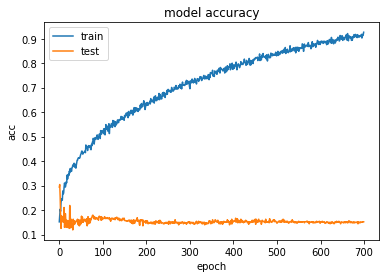

In [188]:
plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [45]:
x_traincnn.shape

(1140, 40, 1)

In [46]:
x_testcnn.shape

(480, 40, 1)

In [48]:
y_test.shape

(480, 7)

In [49]:
y_train.shape

(1140, 6)

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.]], dtype=float32)